**Import libraries**. Look at all the libraries we are importing for this notebook!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
import missingno as msno

Loading dataset into notebook:

In [2]:
df = pd.read_csv('loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First, let us get a basic description of our data:

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


Let us look at some sample data



In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we begin our exploratory data analysis, let us first split our data into train and test sets. This is because the data we obtained have not been split before hand.

In [5]:
x = df
y = df['loan_status']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape, 

((709903, 74), (177476, 74), (709903,), (177476,))

Let us examine numerical features in the train dataset:

In [7]:
numeric_features = x_train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

Let us examine categorical features in the train dataset:

In [8]:
categorical_features = x_train.select_dtypes(include=[np.object])

categorical_features.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

Visualising missing values for a sample of 250:

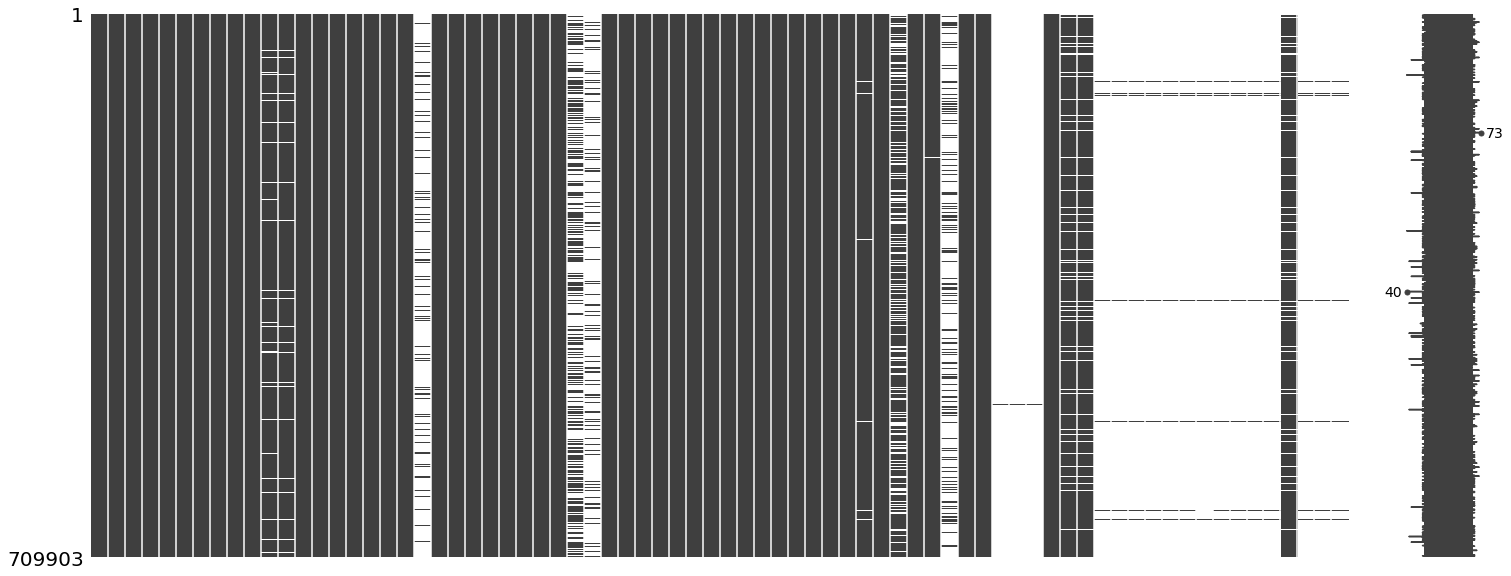

In [9]:
msno.matrix(x_train)

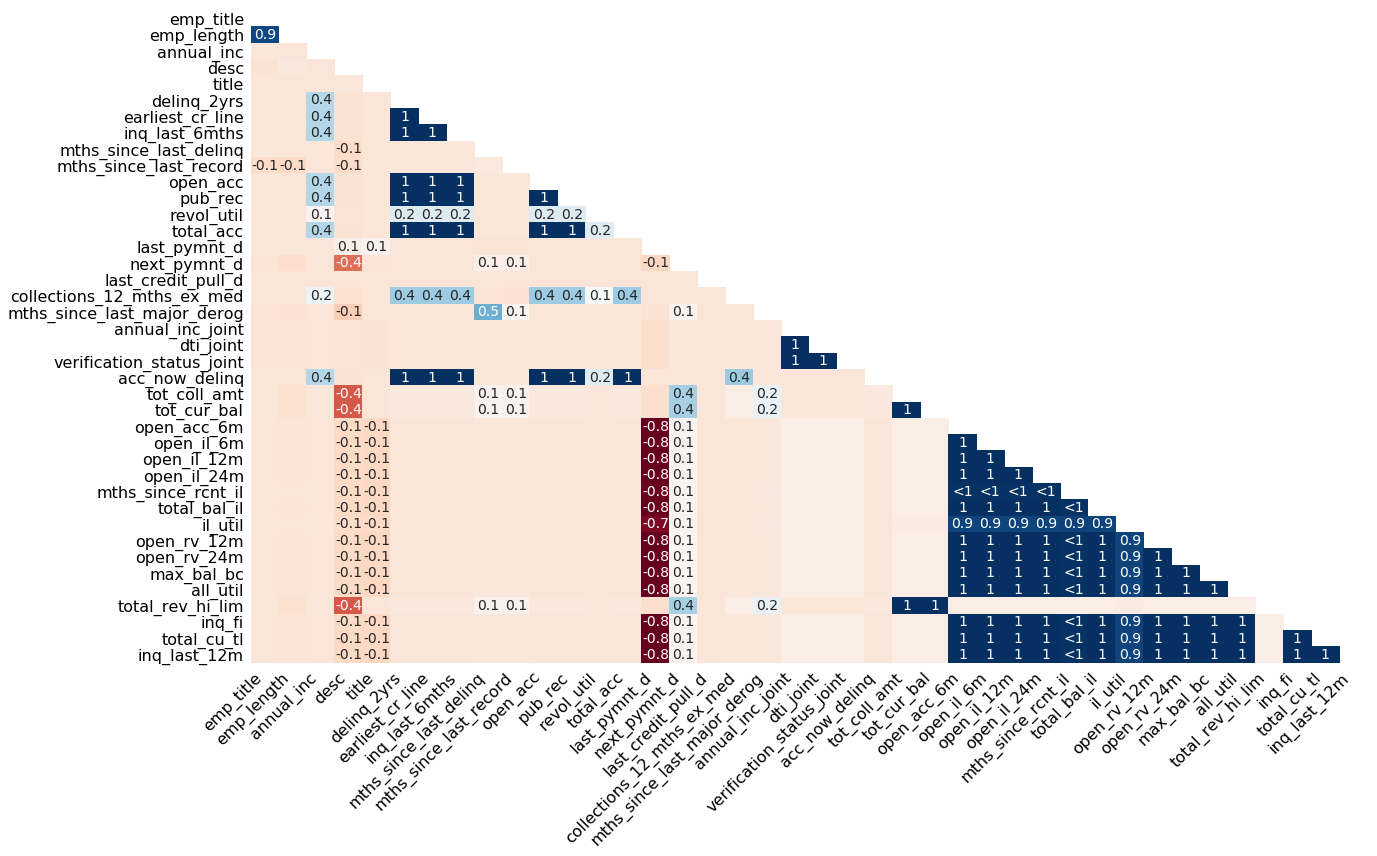

In [10]:
msno.heatmap(x_train)

In [11]:
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y_train, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y_train, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y_train, kde=False, fit=st.lognorm)

Finding Correlation coefficients between numeric features & check for multi-collinearity

In [12]:
correlation = numeric_features.corr()

cols = correlation.index

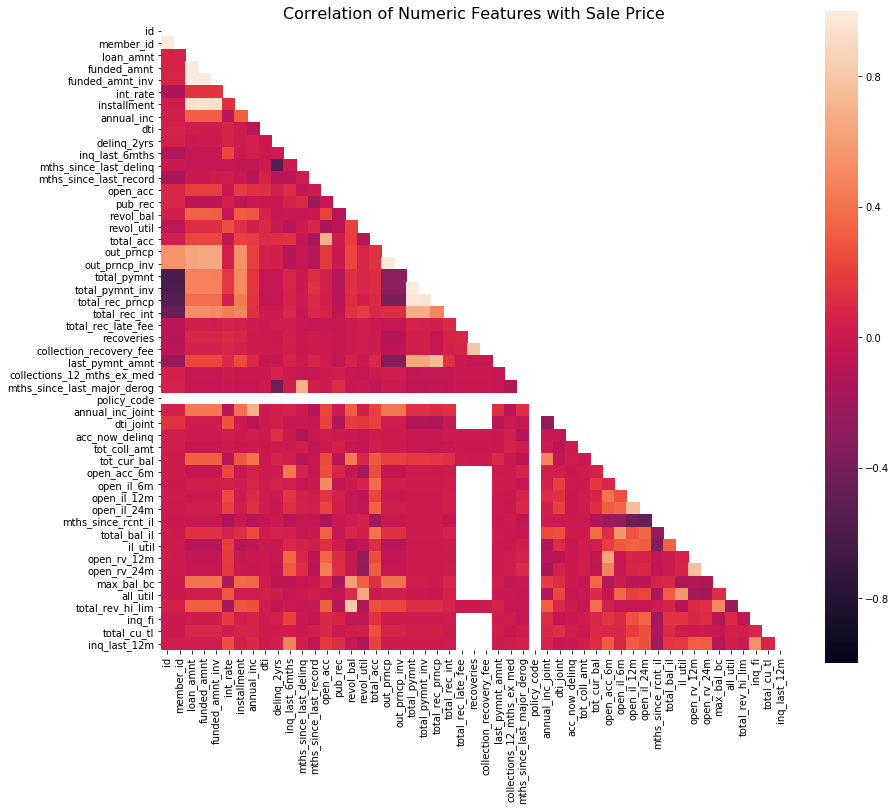

In [13]:

f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation,square = True,annot=False,mask=mask ,
            linecolor="white", vmax=1,vmin = -1)

Observing heatmap, 

features with high correlation includes:
    
    -id vs total_pymnt
    -id vs total_pymnt_inv
    -id vs total_rec_prncp
    
    -member_id vs total_pymnt
    -member_id vs total_pymnt_inv
    -member_id vs total_rec_prncp
    
    -loan_amnt vs fund_amnt
    -loan_amnt vs funded_amnt_inv
    -loan_amnt vs installment
    
    -funded_amnt vs funded_amt_inv
    -funded_amnt vs installment
    
    -funded_amnt_inv vs installment
    
    -delinq_2yrs vs mths_since_last_delinq
    
    
    -total_pymnt vs total_pymnt_inv
    -total_pymnt vs total_rec_prncp
    -total_pymnt_inv vs total_rec_prncp
    
    -open_il_12m vs mths_since_rcnt_il
    
    -open_il_24m vs mths_since_rcnt_il
    
features with null includes:   
    -policy_code
    
    -total_rec_late_fee vs open_acc_6m
    -total_rec_late_fee vs open_il_6m
    -total_rec_late_fee vs open_il_12m
    -total_rec_late_fee vs open_il_24m
    -total_rec_late_fee vs mths_since_rcnt_il
    -total_rec_late_fee vs total_bal_il
    -total_rec_late_fee vs il_util
    -total_rec_late_fee vs open_rv_12m
    -total_rec_late_fee vs open_rv_24m
    -total_rec_late_fee vs max_bal_bc
    -total_rec_late_fee vs all_util
    -total_rec_late_fee vs inq_fi
    -total_rec_late_fee vs total_cu_tl
    -total_rec_late_fee vs inq_last_12m
    
    -recoveries_fee vs open_acc_6m
    -recoveries vs open_il_6m
    -recoveries vs open_il_12m
    -recoveries vs open_il_24m
    -recoveries vs mths_since_rcnt_il
    -recoveries vs total_bal_il
    -recoveries vs il_util
    -recoveries vs open_rv_12m
    -recoveries vs open_rv_24m
    -recoveries vs max_bal_bc
    -recoveries vs all_util
    -recoveries vs inq_fi
    -recoveries vs total_cu_tl
    -recoveries vs inq_last_12m
    
    -collection_recovery_fee vs open_acc_6m
    -collection_recovery_fee vs open_il_6m
    -collection_recovery_fee vs open_il_12m
    -collection_recovery_fee vs open_il_24m
    -collection_recovery_fee vs mths_since_rcnt_il
    -collection_recovery_fee vs total_bal_il
    -collection_recovery_fee vs il_util
    -collection_recovery_fee vs open_rv_12m
    -collection_recovery_fee vs open_rv_24m
    -collection_recovery_fee vs max_bal_bc
    -collection_recovery_fee vs all_util
    -collection_recovery_fee vs inq_fi
    -collection_recovery_fee vs total_cu_tl
    -collection_recovery_fee vs inq_last_12m

In [14]:
correlation1 = correlation.abs()
correlation1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.999429,0.063773,0.066067,0.071515,0.142571,0.025391,0.033990,0.062366,0.049648,...,0.008601,0.012399,0.013918,0.003646,0.000595,0.001221,0.050456,0.002811,0.000335,0.026236
member_id,0.999429,1.000000,0.064429,0.066762,0.072318,0.141814,0.026073,0.034141,0.062402,0.049895,...,0.004231,0.011338,0.007398,0.001970,0.003963,0.001013,0.050398,0.002762,0.005543,0.023705
loan_amnt,0.063773,0.064429,1.000000,0.999242,0.997091,0.145146,0.945008,0.327978,0.018921,0.000160,...,0.140007,0.103700,0.048590,0.025633,0.406347,0.022251,0.320336,0.009724,0.072025,0.016475
funded_amnt,0.066067,0.066762,0.999242,1.000000,0.998023,0.145235,0.946063,0.327724,0.019283,0.000149,...,0.140007,0.103700,0.048590,0.025633,0.406347,0.022251,0.320335,0.009724,0.072025,0.016475
funded_amnt_inv,0.071515,0.072318,0.997091,0.998023,1.000000,0.145304,0.943678,0.326656,0.020315,0.000648,...,0.139979,0.103793,0.048722,0.025753,0.406461,0.022049,0.320371,0.009615,0.072038,0.016353
int_rate,0.142571,0.141814,0.145146,0.145235,0.145304,1.000000,0.133101,0.072957,0.073541,0.054753,...,0.058818,0.194684,0.173357,0.168531,0.106900,0.292725,0.170308,0.176537,0.018634,0.257818
installment,0.025391,0.026073,0.945008,0.946063,0.943678,0.133101,1.000000,0.321423,0.013143,0.007828,...,0.120414,0.097178,0.019824,0.001464,0.380390,0.028259,0.294262,0.016353,0.058306,0.039501
annual_inc,0.033990,0.034141,0.327978,0.327724,0.326656,0.072957,0.321423,1.000000,0.079413,0.047097,...,0.237580,0.055611,0.001552,0.010120,0.364900,0.017373,0.269105,0.063705,0.057255,0.086210
dti,0.062366,0.062402,0.018921,0.019283,0.020315,0.073541,0.013143,0.079413,1.000000,0.002380,...,0.023821,0.004656,0.003817,0.002216,0.009573,0.032637,0.030822,0.010070,0.009733,0.002223
delinq_2yrs,0.049648,0.049895,0.000160,0.000149,0.000648,0.054753,0.007828,0.047097,0.002380,1.000000,...,0.057352,0.012449,0.025649,0.053501,0.067349,0.009606,0.041410,0.044747,0.014567,0.034431


Zoomed heatmap

Index(['id', 'member_id', 'total_pymnt', 'total_pymnt_inv', 'out_prncp',
       'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
       'mths_since_last_record', 'dti_joint', 'int_rate', 'inq_last_6mths'],
      dtype='object')


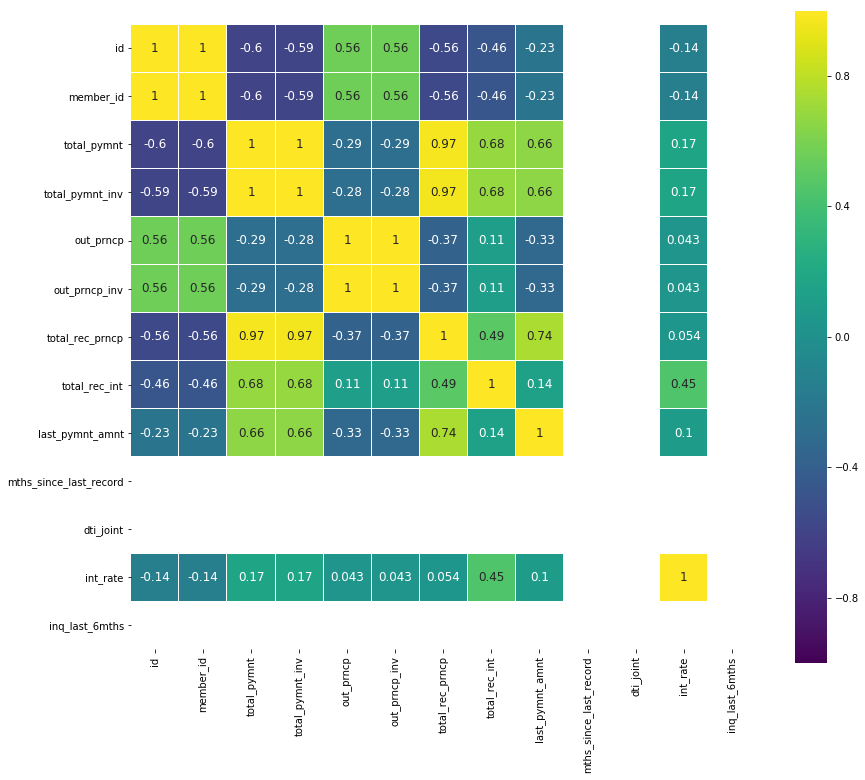

In [15]:

# ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','delinq_2yrs','total_pymnt'
#                                ,'open_il_12m','open_il_24m']

k= 13
cols = correlation1.nlargest(k,'id').index
print(cols)
cm = np.corrcoef(x_train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=1,vmin=-1, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [16]:
numeric_features.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
78798,7709031,9410581,1000.0,1000.0,1000.0,17.76,36.04,34000.0,29.54,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6800.0,NaN,NaN,NaN
826463,41900230,44846945,14400.0,14400.0,14400.0,13.99,492.09,140000.0,9.84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20700.0,NaN,NaN,NaN
47883,9826923,11678858,20050.0,20050.0,20050.0,25.57,595.22,75000.0,16.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13300.0,NaN,NaN,NaN
719244,51316831,54726568,12000.0,12000.0,12000.0,8.18,244.36,37000.0,13.14,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
298532,28733647,31266817,6000.0,6000.0,6000.0,12.49,200.70,30000.0,26.32,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN


In [17]:
numeric_features = numeric_features.dropna()
numeric_features.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
470256,68394211,73283977,22450.0,22450.0,22450.0,21.48,613.43,24000.00,28.10,1.0,...,21245.0,89.7,1.0,6.0,1306.0,64.2,14400.0,6.0,0.0,11.0
478174,67635666,72489389,12000.0,12000.0,12000.0,25.99,359.22,51200.00,14.51,0.0,...,58039.0,83.8,2.0,3.0,2738.0,67.4,11800.0,2.0,1.0,4.0
466850,68340478,72927427,24000.0,24000.0,24000.0,13.44,551.50,96000.00,22.70,0.0,...,43145.0,70.4,1.0,3.0,6210.0,64.1,36400.0,2.0,0.0,5.0
482510,67368015,72179794,19175.0,19175.0,19175.0,20.99,518.65,40000.00,40.05,0.0,...,40678.0,83.7,3.0,6.0,4173.0,80.0,21200.0,1.0,5.0,2.0
466914,68586213,73476013,8750.0,8750.0,8750.0,18.99,320.70,29524.32,46.71,0.0,...,92313.0,88.9,0.0,1.0,1458.0,89.3,2500.0,4.0,0.0,8.0
